In [1]:
import geopandas as gpd
import fiona
from shapely.geometry import Point, MultiPoint
import geoplot
import networkx as nx
from shapely.geometry import LineString
import geoplot.crs as gcrs

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
df = gpd.read_file('StorageUnits_March13.kml', driver='KML')

In [2]:
df.Description=1

In [3]:
basemap = gpd.read_file('Formations2_March12.kml', driver='KML')
# just europe country shape

Formations = gpd.read_file('Formations2_March12.kml', driver='KML')
# just europe country shape

In [5]:
Formations

Name Description  \
0              Upper Malm and Lower Cretaceous               
1                                  Muschelkalk               
2                              Hauptrogenstein               
3                         Upper Marine Molasse               
4    Sarmatian Formation from Getic Depression               
..                                         ...         ...   
110           Channel Sherwood Sandstone Group               
111                    Zechsteinkalk Formation               
112                Spilsby Sandstone Formation               
113                         Schooner Formation               
114                   Plattendolomit Formation               

                                              geometry  
0    MULTIPOLYGON (((6.01278 46.14642, 6.02168 46.1...  
1    MULTIPOLYGON (((6.66091 46.72366, 6.66126 46.6...  
2    MULTIPOLYGON (((6.50038 46.63081, 6.43383 46.6...  
3    MULTIPOLYGON (((8.78922 47.27058, 8.80605 47.2...  
4    MULTIPOLYGON (((24.28581 45.10144, 24.24597 45...  
..                                                 ...  
110  MULTIPOLYGON (((-2.64158 50.31992, -2.69249 50...  
111  MULTIPOLYGON (((1.66483 53.12766, 1.72318 53.1...  
112  MULTIPOLYGON (((3.05965 52.41487, 2.89545 52.2...  
113  MULTIPOLYGON (((1.33698 53.69832, 1.32096 53.6...  
114  MULTIPOLYGON (((-1.32827 54.84171, -1.11496 54...  

[115 rows x 3 columns]

In [38]:

gpd.read_file('StorageUnits_March12.kml', driver='KML')

Name Description  \
0                              Malm Limestones               
1                          Trigonodus Dolomite               
2                              Hauptrogenstein               
3                         Upper Marine Molasse               
4    Banda Plegada de Ubierna  (Buntsandstein)               
..                                         ...         ...   
313                                  Voitsdorf               
314                                                          
315                                                          
316                                                          
317                                                          

                                              geometry  
0    MULTIPOLYGON Z (((6.01278 46.14642 0.00000, 6....  
1    MULTIPOLYGON Z (((6.66091 46.72366 0.00000, 6....  
2    MULTIPOLYGON Z (((6.50038 46.63081 0.00000, 6....  
3    MULTIPOLYGON Z (((8.78922 47.27058 0.00000, 8....  
4    MULTIPOLYGON Z (((-3.96456 42.62893 -600.00000...  
..                                                 ...  
313  MULTIPOLYGON Z (((14.03181 48.01991 0.00000, 1...  
314  MULTIPOLYGON Z (((9.97538 55.84148 0.00000, 9....  
315  MULTIPOLYGON Z (((9.58432 58.07396 0.00000, 9....  
316  MULTIPOLYGON Z (((12.08650 56.30334 0.00000, 1...  
317  MULTIPOLYGON Z (((12.08650 56.30334 0.00000, 1...  

[318 rows x 3 columns]

In [8]:
Formations

Name Description  \
0              Upper Malm and Lower Cretaceous               
1                                  Muschelkalk               
2                              Hauptrogenstein               
3                         Upper Marine Molasse               
4    Sarmatian Formation from Getic Depression               
..                                         ...         ...   
110           Channel Sherwood Sandstone Group               
111                    Zechsteinkalk Formation               
112                Spilsby Sandstone Formation               
113                         Schooner Formation               
114                   Plattendolomit Formation               

                                              geometry  
0    MULTIPOLYGON (((6.01278 46.14642, 6.02168 46.1...  
1    MULTIPOLYGON (((6.66091 46.72366, 6.66126 46.6...  
2    MULTIPOLYGON (((6.50038 46.63081, 6.43383 46.6...  
3    MULTIPOLYGON (((8.78922 47.27058, 8.80605 47.2...  
4    MULTIPOLYGON (((24.28581 45.10144, 24.24597 45...  
..                                                 ...  
110  MULTIPOLYGON (((-2.64158 50.31992, -2.69249 50...  
111  MULTIPOLYGON (((1.66483 53.12766, 1.72318 53.1...  
112  MULTIPOLYGON (((3.05965 52.41487, 2.89545 52.2...  
113  MULTIPOLYGON (((1.33698 53.69832, 1.32096 53.6...  
114  MULTIPOLYGON (((-1.32827 54.84171, -1.11496 54...  

[115 rows x 3 columns]

In [25]:
k = pd.read_csv('../CO2Stop_DataInterrogationSystem/Hydrocarbon_Formations.csv')

In [59]:
from shapely.geometry import Point
import geopandas as gpd
import re

def load2geodf(Path = '../CO2Stop_DataInterrogationSystem/Hydrocarbon_Formations.csv'):
    f = pd.read_csv(Path)
    f['geometry'] = f.apply(lambda x: Point((x['X'],x['Y'])),axis=1)
    f = gpd.GeoDataFrame(f,crs = 'EPSG:32631')
    candidate = [] 
    for i in f.columns:
        if re.search('cap',i.lower()):
            candidate.append(i)
    return f,candidate

In [60]:
trap,trap_cap = load2geodf('../CO2Stop_DataInterrogationSystem/Hydrocarbon_Traps.csv')
trap2,trap2_cap = load2geodf('../CO2Stop_DataInterrogationSystem/Hydrocarbon_Traps1.csv')

In [63]:
trap_cap

['EST_STORECAP_MIN',
 'EST_STORECAP_MEAN',
 'EST_STORECAP_MAX',
 'CAP_EST_METHOD',
 'MIN_EST_STORE_CAP_GAS',
 'MEAN_EST_STORE_CAP_GAS',
 'MAX_EST_STORE_CAP_GAS',
 'MIN_EST_STORE_CAP_OIL',
 'MEAN_EST_STORE_CAP_OIL',
 'MAX_EST_STORE_CAP_OIL',
 'MIN_CALC_STORE_CAP_GAS',
 'MEAN_CALC_STORE_CAP_GAS',
 'MAX_CALC_STORE_CAP_GAS',
 'MIN_CALC_STORE_CAP_OIL',
 'MEAN_CALC_STORE_CAP_OIL',
 'MAX_CALC_STORE_CAP_OIL',
 'STORE_CAP_MIN',
 'STORE_CAP_MEAN',
 'STORE_CAP_MAX',
 'CAP_CAL_METHOD',
 'EST_CAP_ENT_PRESS']

In [73]:
from pandas_profiling import ProfileReport
trap[trap_cap].describe()
ProfileReport(trap[trap_cap],minimal=True)
# so many capacity choose which one?
##
'''
Daughter unit also face zero problem (missing value)
almost all columns about capacity have more than 80% zero
'''

/opt/anaconda3/envs/geoproject/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
storage_unit,su_cap = load2geodf('../CO2Stop_DataInterrogationSystem/Hydrocarbon_Storage_Units.csv')
formation,formation_cap = load2geodf('../CO2Stop_DataInterrogationSystem/Hydrocarbon_Formations.csv')

In [111]:
#import pycountry
code = pycountry.countries.search_fuzzy('IT')[0].alpha_2

In [113]:
storage_unit[storage_unit['COUNTRYCODE']==code]

OBJECTID            FORMATION_ID         STORAGE_UNIT_ID  \
75        174  IT_F_20121001124148805  IT_S_20121001151504215   
76        175  IT_F_20121003174905644  IT_S_20121003175745519   
77        176  IT_F_20121004153029368  IT_S_20121004153204821   
78        177  IT_F_20121004163430395  IT_S_20121004175734558   
79        178  IT_F_20121009153149008  IT_S_20121009153225384   
80        179  IT_F_20121009161532346  IT_S_20121009161621580   
81        180  IT_F_20121010122552181  IT_S_20121010122618306   
82        181  IT_F_20121010135221305  IT_S_20121010135239899   
83        182  IT_F_20121010141900087  IT_S_20121010143318891   
84        183  IT_F_20121010145802588  IT_S_20121010151127297   
165       184  IT_F_20121010152539660  IT_S_20121010152629738   
166       185  IT_F_20121010153841021  IT_S_20121010153941584   
167       186  IT_F_20121010165100811  IT_S_20121010165609360   
168       187  IT_F_20121010170832724  IT_S_20121010171113037   
169       188  IT_F_20121010172946255  IT_S_20121010173033911   
170       189  IT_F_20121010180248517  IT_S_20121010180305267   
171       190  IT_F_20121031102032101  IT_S_20121031102513070   
172       191  IT_F_20121031104250082  IT_S_20121031104302098   
173       192  IT_F_20121031111256239  IT_S_20121031111303505   
174       193  IT_F_20121031114012049  IT_S_20121031114024236   
175       194  IT_F_20121031114948505  IT_S_20121031115000333   
176       195  IT_F_20121031115739676  IT_S_20121031115753458   
177       196  IT_F_20121031120211176  IT_S_20121031120213880   
178       197  IT_F_20121031120548505  IT_S_20121031120555489   
179       198  IT_F_20121031120838911  IT_S_20121031120848176   
180       199  IT_F_20121031121123708  IT_S_20121031121144036   

                      STORAGE_UNIT_NAME  \
75          Casirate 1 - Lombardia 1 SU   
76           Pandino 1 - Lombardia 2 SU   
77      Poggio Rusco 1 - Lombardia 3 SU   
78   S.Pietro in Casale 3 - Emilia 1 SU   
79               Filetto1 - Emilia 2 SU   
80                     BAGNOLO MELLA SU   
81       Serena Nord 1 - Emilia mare SU   
82                 Jesi 6 - Marche 1 SU   
83           Notaresco 1 - Abruzzi 1 SU   
84         Pomarico 7 - Basilicata 1 SU   
165             Licia 1 - Calabria 1 SU   
166         Lara 1 - Calabria mare 1 SU   
167        Fosca 1 - Calabria mare 2 SU   
168            Biddusa 2 - Sicilia 1 SU   
169              Furci 9 - Abruzzi 2 SU   
170                        COTIGNOLA SU   
171                  CUGNO LE MACINE SU   
172                             LENO SU   
173                      PIADENA EST SU   
174                    SERRA PIZZUTA SU   
175              PORTO CORSINI TERRA SU   
176                        RAPAGNANO SU   
177                    RAVENNA TERRA SU   
178                        ROMANENGO SU   
179                      S.BENEDETTO SU   
180                         S.POTITO SU   

                              ASSESS_UNIT_TYPE  PERIOD_MIN PERIOD_MAX  \
75   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
76   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
77   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
78   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
79   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
80      Saline Aquifer with hydrocarbon fields         NaN        NaN   
81   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
82   Saline Aquifer without hydrocarbon fields         NaN        NaN   
83   Saline Aquifer without hydrocarbon fields     Neogene        NaN   
84   Saline Aquifer without hydrocarbon fields  quaternary        NaN   
165  Saline Aquifer without hydrocarbon fields         NaN        NaN   
166  Saline Aquifer without hydrocarbon fields         NaN        NaN   
167  Saline Aquifer without hydrocarbon fields     Neogene        NaN   
168  Saline Aquifer without hydrocarbon fields     Neogene       

In [74]:
ProfileReport(storage_unit[su_cap],minimal=True)

/opt/anaconda3/envs/geoproject/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
ProfileReport(formation[formation_cap],minimal=True)

/opt/anaconda3/envs/geoproject/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Summarize dataset:   0%|          | 0/11 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
k = gpd.GeoDataFrame(k,crs = 'EPSG:32631')

In [28]:

df.to_crs('EPSG:3857').geometry.area<1e10

0      False
1       True
2       True
3       True
4       True
       ...  
413    False
414    False
415     True
416    False
417    False
Length: 418, dtype: bool

In [29]:
df_without_max = df[df.to_crs('EPSG:3857').geometry.area<1e10]

In [30]:
k.head()

OBJECTID            FORMATION_ID                 FORMATION_NAME  \
0        14  AT_F_20120924170441760    Hauptdolomit_tyrolian nappe   
1        15  AT_F_20120925142717238                 Obereozänsande   
2        16  AT_F_20120925143950381                   Cenomansande   
3        17  AT_F_20120925152752701  dolomitische Quarzarenitserie   
4        18  AT_F_20121102160144734  Hauptdolomit_bajuvarian nappe   

   NO_STORE_UNITS  NO_DAUGHTER_UNITS                        ASSESS_UNIT_TYPE  \
0               1                  2  Saline Aquifer with hydrocarbon fields   
1               1                  0                                     NaN   
2               1                  0  Saline Aquifer with hydrocarbon fields   
3               1                  0                                     NaN   
4               2                  0  Saline Aquifer with hydrocarbon fields   

  PERIOD_MIN  PERIOD_MAX     AGE_MIN     AGE_MAX  ... COUNTRYCODE LAMBERT_E  \
0   Triassic    Triassic     Carnian      Norian  ...          AT       0.0   
1  Paleogene   Paleogene  Priabonian    Lutetian  ...          AT       0.0   
2  Paleogene  Cretaceous  Priabonian  Cenomanian  ...          AT       0.0   
3   Jurassic    Jurassic   Callovian    Aalenian  ...          AT       0.0   
4   Triassic    Triassic     Carnian      Norian  ...          AT       0.0   

  LAMBERT_N X_DD Y_DD              X             Y         Projection_Info  \
0       0.0  0.0  0.0  625318.326319  5.355955e+06  ETRS_1989_UTM_Zone_33N   
1       0.0  0.0  0.0  406415.643003  5.324266e+06  ETRS_1989_UTM_Zone_33N   
2       0.0  0.0  0.0  429219.378033  5.317758e+06  ETRS_1989_UTM_Zone_33N   
3       0.0  0.0  0.0  596081.964935  5.354388e+06  ETRS_1989_UTM_Zone_33N   
4       0.0  0.0  0.0  620521.446000  5.354640e+06  ETRS_1989_UTM_Zone_33N   

         Date_Entered                        geometry  
0  24-009-12 17:04:41  POINT (625318.326 5355954.886)  
1  25-009-12 14:27:17  POINT (406415.643 5324265.961)  
2  25-009-12 14:39:50  POINT (429219.378 5317758.300)  
3  25-009-12 15:27:52  POINT (596081.965 5354388.128)  
4  02-011-12 16:01:44  POINT (620521.446 5354639.782)  

[5 rows x 34 columns]

In [44]:
# capacity Relevant columns
import re
candidate = [] 
for i in k.columns:
    if re.search('cap',i.lower()):
        candidate.append(i)

In [127]:
formation.groupby('COUNTRYCODE').sum()[formation_cap]

STORE_CAP_FORM  STORE_CAP_HC_FIELDS  STORE_CAP_AQUIF
COUNTRYCODE                                                      
AT                 0.000000             0.000000         0.000000
BE               227.093178             0.000000       227.093178
BG                 0.000000             0.000000         0.000000
CH              1849.948875             0.000000      1849.948875
CZ               469.239724            21.562709       447.677015
DE                 0.000000             0.000000         0.000000
DK             51922.462538             0.000000     51922.462538
EE                 0.000000             0.000000         0.000000
ES                 0.000000             0.000000         0.000000
FR                 0.000000             0.000000         0.000000
GB            192272.944851          2826.811883    189446.132968
GR             10544.589191          1041.231296      9503.357895
HR              4056.141102             0.000000      4056.141102
HU               214.329330             0.178763       214.150567
IE              2050.684326             0.000000      2050.684326
IT              4513.069555           133.650515      4379.419040
LT                89.436149             4.739174        84.696975
LV             13552.000000             0.000000     13552.000000
MK               143.308800             0.000000       143.308800
NL                 0.000000             0.000000         0.000000
NO             15770.000000             0.000000     15770.000000
PL            198647.552496             0.000000    198647.552496
PT                 0.000000             0.000000         0.000000
RO                 0.000000             0.000000         0.000000
RS                 0.000000             0.000000         0.000000
SI               154.375320             0.000000       154.375320
SK              1819.788937             0.063252      1819.725685

In [129]:
su_cap

['EST_STORECAP_MIN',
 'EST_STORECAP_MEAN',
 'EST_STORECAP_MAX',
 'CAP_EST_METHOD',
 'STORE_CAP_MIN',
 'STORE_CAP_MEAN',
 'STORE_CAP_MAX',
 'CAP_CAL_METHOD',
 'TOTAL_STORE_CAP',
 'STORE_CAP_HCDAUGHTER',
 'EST_CAP_ENT_PRESS']

In [130]:
#storage_unit[su_cap]
storage_unit.groupby('COUNTRYCODE').sum()[['EST_STORECAP_MIN',
 'EST_STORECAP_MEAN',
 'EST_STORECAP_MAX',
 'STORE_CAP_MIN',
 'STORE_CAP_MEAN',
 'STORE_CAP_MAX',
 'TOTAL_STORE_CAP',
 'STORE_CAP_HCDAUGHTER',
 'EST_CAP_ENT_PRESS']]

EST_STORECAP_MIN  EST_STORECAP_MEAN  EST_STORECAP_MAX  \
COUNTRYCODE                                                          
AT                     0.0000         19574.1880      0.000000e+00   
BE                    86.0000           242.0000      2.414000e+03   
BG                  2273.0000          2568.5600      3.019000e+03   
CH                     0.0000          2678.0000      0.000000e+00   
CZ                   383.0000           423.0000      4.620000e+02   
DE                     0.0000             0.0000      0.000000e+00   
DK                 12335.0000        464400.0000      3.257000e+06   
ES                     0.0000          5934.5900      0.000000e+00   
FR                     0.0000         29100.0000      0.000000e+00   
GB                     0.0000             0.0000      0.000000e+00   
GR                  1860.0000          1970.0000      2.080000e+03   
HR                     0.0000          4066.6750      0.000000e+00   
HU                     0.0000           310.7600      0.000000e+00   
IE                     0.0000           499.9000      0.000000e+00   
IT                  4585.9202          4585.9202      4.585920e+03   
LT                    73.0000            78.0000      8.500000e+01   
LV                  1417.0000         13552.0000      4.633700e+04   
MK                    20.9000            20.9000      2.090000e+01   
NL                     0.0000             0.0000      0.000000e+00   
NO                     0.0000         45030.0000      0.000000e+00   
PL                  7194.9000        198647.6000      3.182529e+06   
PT                  5700.0000           845.0000      0.000000e+00   
RO                 21609.6000         18000.0000      5.332980e+04   
RS                     0.0000             0.0000      0.000000e+00   
SI                     2.2200           154.4100      1.111000e+01   
SK                  2331.3510          7398.1030      1.328333e+04   

             STORE_CAP_MIN  STORE_CAP_MEAN  STORE_CAP_MAX  TOTAL_STORE_CAP  \
COUNTRYCODE                                                                  
AT                0.000000        0.000000   0.000000e+00         0.000000   
BE                0.000000      227.093178   0.000000e+00       227.093178   
BG                0.000000        0.000000   0.000000e+00         0.000000   
CH              177.373355     1849.948875   1.812641e+04      1849.948875   
CZ              162.440081      447.677015   1.199952e+03       447.677015   
DE                0.000000        0.000000   0.000000e+00         0.000000   
DK              262.956541    51922.462538   2.753427e+05     51922.462538   
ES                0.000000        0.000000   0.000000e+00         0.000000   
FR                0.000000        0.000000   0.000000e+00         0.000000   
GB            38223.424210   189446.132968   5.472958e+05    192166.944851   
GR             4882.726215     9503.357895   2.300750e+04     10544.589191   
HR                0.000000     4056.141102   0.000000e+00      4056.141102   
HU                0.000000      214.150567   0.000000e+00       214.150567   
IE              472.200000     2050.684326   4.682650e+03      2050.684326   
IT             4585.148824     4585.148824   4.585149e+03      4585.148824   
LT               49.688892       84.696975   1.321273e+02        89.436149   
LV             1417.500000    13552.000000   4.633720e+04     13552.000000   
MK               34.356000      143.308800   3.618720e+02       143.308800   
NL                0.000000        0.000000   0.000000e+00         0.000000   
NO                0.000000        0.000000   0.000000e+00         0.000000   
PL            10699.796574   198647.552496   2.957875e+06    198647.552496   
PT                0.000000        0.000000   0.000000e+00         0.000000   
RO                0.000000        0.000000   0.000000e+00         0.000000   
RS                0.000000        0.000000   0.000000e+00         0.000000   
SI                0.0000

In [116]:
storage_unit['ASSESS_UNIT_TYPE'].unique()

array(['Saline Aquifer without hydrocarbon fields',
       'Saline Aquifer with hydrocarbon fields', nan,
       'saline aquifer with hydrocarbon fields'], dtype=object)

In [131]:
trap_cap

['EST_STORECAP_MIN',
 'EST_STORECAP_MEAN',
 'EST_STORECAP_MAX',
 'CAP_EST_METHOD',
 'MIN_EST_STORE_CAP_GAS',
 'MEAN_EST_STORE_CAP_GAS',
 'MAX_EST_STORE_CAP_GAS',
 'MIN_EST_STORE_CAP_OIL',
 'MEAN_EST_STORE_CAP_OIL',
 'MAX_EST_STORE_CAP_OIL',
 'MIN_CALC_STORE_CAP_GAS',
 'MEAN_CALC_STORE_CAP_GAS',
 'MAX_CALC_STORE_CAP_GAS',
 'MIN_CALC_STORE_CAP_OIL',
 'MEAN_CALC_STORE_CAP_OIL',
 'MAX_CALC_STORE_CAP_OIL',
 'STORE_CAP_MIN',
 'STORE_CAP_MEAN',
 'STORE_CAP_MAX',
 'CAP_CAL_METHOD',
 'EST_CAP_ENT_PRESS']

In [132]:
trap.groupby('COUNTRYCODE').sum()[['EST_STORECAP_MIN',
 'EST_STORECAP_MEAN',
 'EST_STORECAP_MAX',
 'MIN_EST_STORE_CAP_GAS',
 'MEAN_EST_STORE_CAP_GAS',
 'MAX_EST_STORE_CAP_GAS',
 'MIN_EST_STORE_CAP_OIL',
 'MEAN_EST_STORE_CAP_OIL',
 'MAX_EST_STORE_CAP_OIL',
 'MIN_CALC_STORE_CAP_GAS',
 'MEAN_CALC_STORE_CAP_GAS',
 'MAX_CALC_STORE_CAP_GAS',
 'MIN_CALC_STORE_CAP_OIL',
 'MEAN_CALC_STORE_CAP_OIL',
 'MAX_CALC_STORE_CAP_OIL',
 'STORE_CAP_MIN',
 'STORE_CAP_MEAN',
 'STORE_CAP_MAX',
 'EST_CAP_ENT_PRESS']]

EST_STORECAP_MIN  EST_STORECAP_MEAN  EST_STORECAP_MAX  \
COUNTRYCODE                                                          
AT                        0.0                0.0               0.0   
BE                       15.0               27.0              40.0   
BG                        0.0                0.0               0.0   
CZ                      167.0              188.4             210.0   
DE                     1102.0                0.0            2887.0   
DK                    15730.0            16027.0           17000.0   
FR                        0.0                0.0               0.0   
GB                        0.0                0.0               0.0   
GR                     1876.0             1976.0            2100.0   
HR                        0.0                0.0               0.0   
HU                        0.0              450.2               0.0   
IE                        0.0               40.5               0.0   
IT                        0.0                0.0               0.0   
LT                       68.0               72.7              80.0   
LV                      337.0              919.0             929.0   
MK                      130.7              130.7             130.7   
NL                      100.0             1372.5             225.0   
NO                        0.0              391.0               0.0   
PL                     4433.6             5942.8            7076.9   
RO                        0.0                0.0               0.0   
SK                        0.0                0.0               0.0   

             MIN_EST_STORE_CAP_GAS  MEAN_EST_STORE_CAP_GAS  \
COUNTRYCODE                                                  
AT                        0.000000            22000.000000   
BE                        0.000000                0.000000   
BG                        4.000000                5.000000   
CZ                       16.300000               18.000000   
DE                        0.000000             2255.400000   
DK                        0.000000                0.000000   
FR                        0.000000                0.000000   
GB                     4671.560000             5277.200000   
GR                        5.500000                6.000000   
HR                        0.000000              136.413427   
HU                        0.000000               94.950000   
IE                        0.000000              332.000000   
IT                      132.488107              132.488107   
LT                        0.590000                0.590000   
LV                        0.000000                0.000000   
MK                        0.000000                0.000000   
NL                        9.800000             9960.030000   
NO                        0.000000                0.000000   
PL                        0.000000                0.000000   
RO                        0.000000              267.560000   
SK                        0.400000                0.521000   

             MAX_EST_STORE_CAP_GAS  MIN_EST_STORE_CAP_OIL  \
COUNTRYCODE                                                 
AT                        0.000000               0.000000   
BE                        0.000000               0.000000   
BG                        6.000000               0.000000   
CZ                       19.700000               1.250000   
DE                        0.000000               0.000000   
DK                        0.000000               0.000000   
FR                        0.000000               0.000000   
GB                     5608.650000            2427.740000   
GR                        6.500000              29.000000   
HR                        0.000000               0.000000   
HU                        0.000000               0.000000   
IE                        0.000000               0.000000   
IT                      132.488107               1.062907   
LT                        0.590000               6.490000   

In [120]:
formation['ASSESS_UNIT_TYPE'].unique()

array(['Saline Aquifer with hydrocarbon fields', nan,
       'Saline Aquifer without hydrocarbon fields',
       'saline aquifer with hydrocarbon fields', '2'], dtype=object)

In [45]:
candidate

['STORE_CAP_FORM', 'STORE_CAP_HC_FIELDS', 'STORE_CAP_AQUIF']

In [49]:
k[candidate]

STORE_CAP_FORM  STORE_CAP_HC_FIELDS  STORE_CAP_AQUIF
0               0.0                  0.0              0.0
1               0.0                  0.0              0.0
2               0.0                  0.0              0.0
3               0.0                  0.0              0.0
4               0.0                  0.0              0.0
..              ...                  ...              ...
274             0.0                  0.0              0.0
275             0.0                  0.0              0.0
276             0.0                  0.0              0.0
277             0.0                  0.0              0.0
278             0.0                  0.0              0.0

[279 rows x 3 columns]

/opt/anaconda3/envs/geoproject/lib/python3.6/site-packages/geoplot/geoplot.py:720: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


<GeoAxesSubplot:>

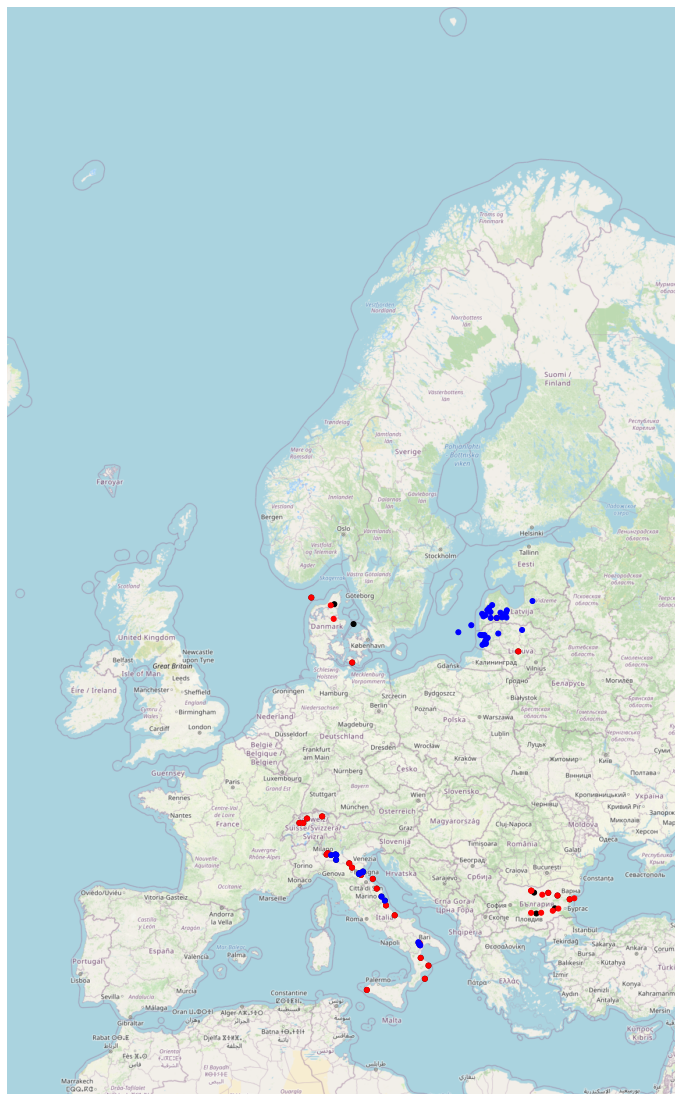

In [55]:
#StorageUnits
eu=gpd.read_file('../country_shapes.geojson')
ax = geoplot.webmap(eu,projection=gcrs.WebMercator(),figsize=(30,20),alpha=1)
#geoplot.choropleth(Formations, hue='Name',ax=ax,alpha=0.5,edgecolor='red', linewidth=2)
geoplot.pointplot(formation, ax=ax,color='black')
geoplot.pointplot(storage_unit, ax=ax,color='red')
geoplot.pointplot(trap, ax=ax,color='blue')
geoplot.pointplot(trap2, ax=ax,color='blue')

In [11]:
eu.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<GeoAxesSubplot:>

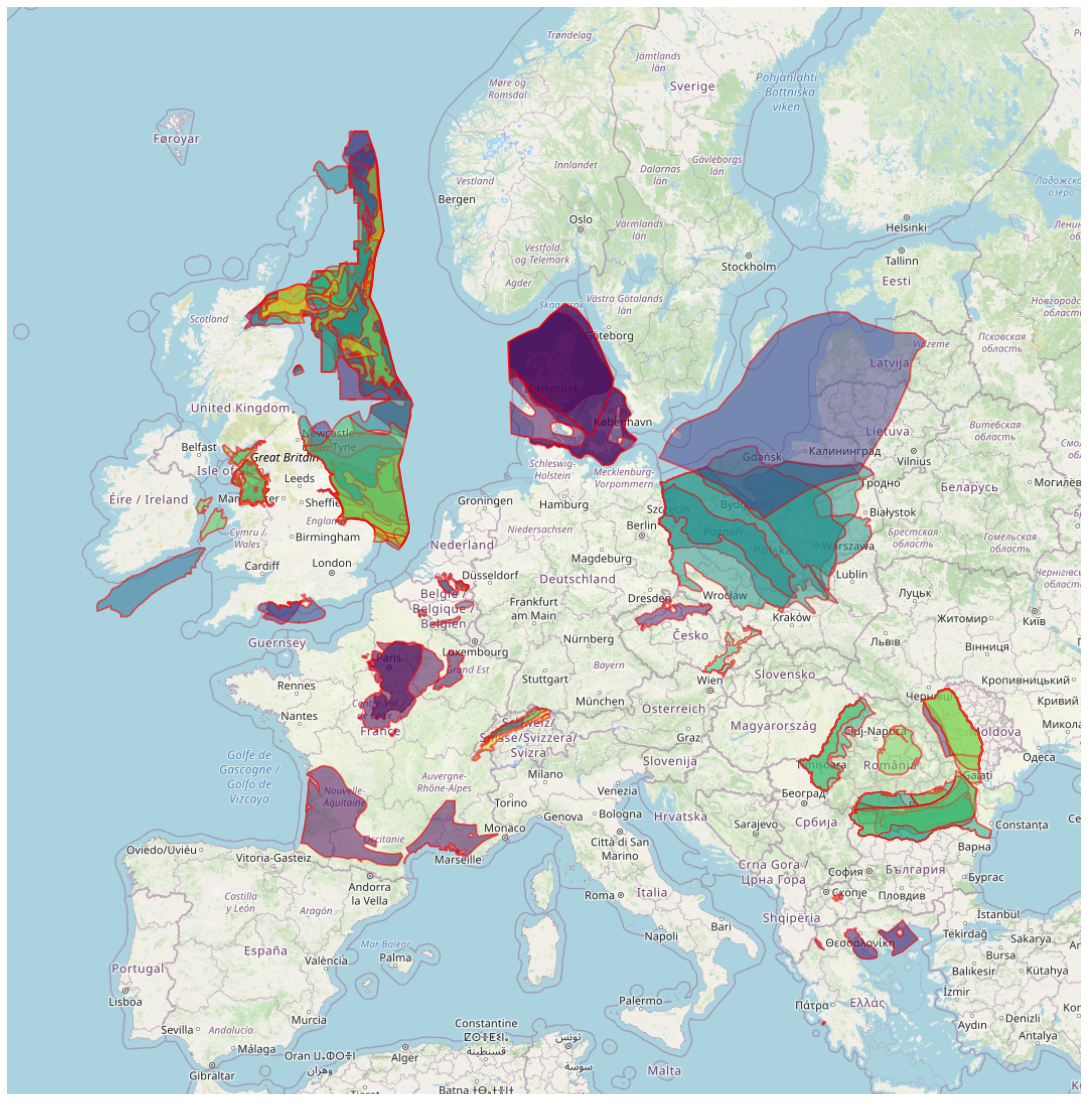

In [44]:
#Formations 
Formations = gpd.read_file('Formations2_March12.kml', driver='KML')

eu=gpd.read_file('../country_shapes.geojson')
ax = geoplot.webmap(eu,projection=gcrs.WebMercator(),figsize=(30,20),alpha=1)
geoplot.choropleth(Formations, hue='Name',ax=ax,alpha=0.5,edgecolor='red', linewidth=2)

In [45]:
Formations.head()

Name Description  \
0            Upper Malm and Lower Cretaceous               
1                                Muschelkalk               
2                            Hauptrogenstein               
3                       Upper Marine Molasse               
4  Sarmatian Formation from Getic Depression               

                                            geometry  
0  MULTIPOLYGON (((6.01278 46.14642, 6.02168 46.1...  
1  MULTIPOLYGON (((6.66091 46.72366, 6.66126 46.6...  
2  MULTIPOLYGON (((6.50038 46.63081, 6.43383 46.6...  
3  MULTIPOLYGON (((8.78922 47.27058, 8.80605 47.2...  
4  MULTIPOLYGON (((24.28581 45.10144, 24.24597 45...

<GeoAxesSubplot:>

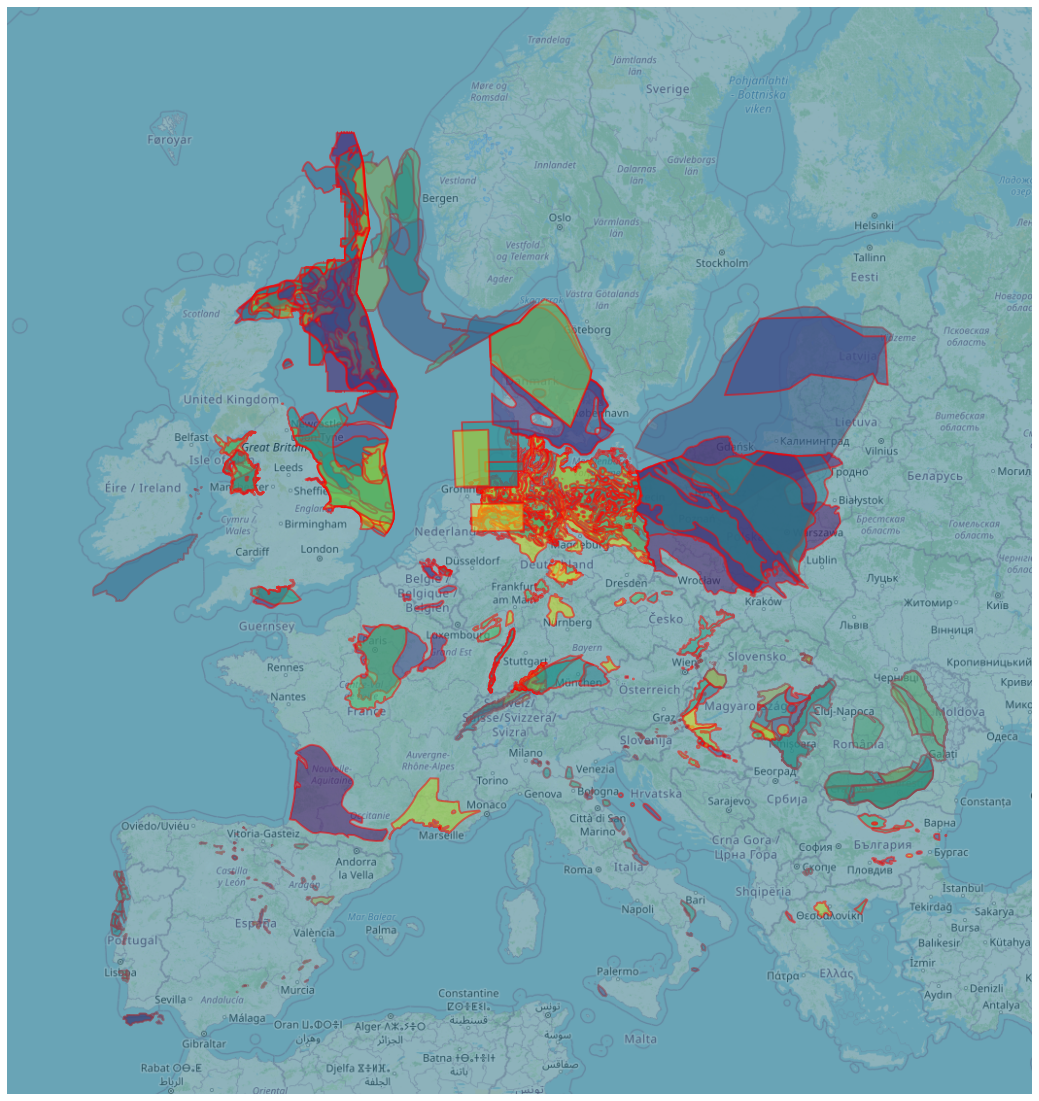

In [114]:


#DaughterUnits 
DaughterUnits = gpd.read_file('StorageUnits_March13.kml', driver='KML')

eu=gpd.read_file('../country_shapes.geojson')
ax = geoplot.webmap(eu,projection=gcrs.WebMercator(),figsize=(30,20),alpha=1)
geoplot.choropleth(DaughterUnits, hue='Name',ax=ax,alpha=0.5,edgecolor='red', linewidth=2)

In [7]:
import pandas as pd

In [8]:
table = pd.read_csv('Total_Storage_Cap_Aquif_HCFields.csv')

In [9]:
table.sort_values('COUNTRY')

OBJECTID              COUNTRY  Cnt_COUNTRY  Sum_EST_STORECAP_MEAN  \
0          1              Austria            6             19574.1880   
1          2              Belgium            7               242.0000   
2          3             Bulgaria           11              2568.5600   
3          4              Croatia           14              4066.6750   
4          5       Czech Republic            6               423.0000   
5          6              Denmark            4            464400.0000   
6          7               France            5             29100.0000   
7          8              Germany           25                 0.0000   
8          9               Greece            3              1970.0000   
9         10              Hungary           16               310.7600   
10        11              Ireland            9               499.9000   
11        12                Italy           26              4585.9202   
12        13               Latvia            1             13552.0000   
13        14            Lithuania            1                78.0000   
14        15            Macedonia            3                20.9000   
15        16          Netherlands           18                 0.0000   
16        17               Norway            9             45030.0000   
17        18               Poland            4            198647.6000   
21        22             Portugal           32               845.0000   
18        19              Romania           15             18000.0000   
22        23  Serbia & Montenegro            2                 0.0000   
19        20             Slovakia           37              7398.1030   
23        24             Slovenia           37               154.4100   
24        25                Spain           45              5934.5900   
25        26          Switzerland            4              2678.0000   
20        21       United Kingdom           96                 0.0000   

    Sum_STORE_CAP_MEAN  Total_Aquifer_StoreCap  \
0             0.000000            19574.188000   
1           227.093178              242.000000   
2             0.000000             2568.560000   
3          4056.141102             4066.675000   
4           447.677015              423.000000   
5         51922.462538           464400.000000   
6             0.000000            29100.000000   
7             0.000000                0.000000   
8          9503.357895             1970.000000   
9           214.150567              310.760000   
10         2050.684326              499.900000   
11         4585.148824             4585.920200   
12        13552.000000            13552.000000   
13           84.696975               78.000000   
14          143.308800               20.900000   
15            0.000000                0.000000   
16            0.000000            45030.000000   
17       198647.552496           198647.600000   
21            0.000000              845.000000   
18            0.000000            18000.000000   
22            0.000000                0.000000   
19         1819.725685             7398.103000   
23          154.375320              154.410000   
24            0.000000             5934.590000   
25         1849.948875             2678.000000   
20       189446.132968           189446.132968   

    Total_StoreCap_Aquif_plus_HCFields_User_Est  OBJECTID_1       COUNTRY_1  \
0                                  41591.188000           1         Austria   
1                                    242.000000           2         Belgium   
2                                   2573.560000           3        Bulgaria   
3                                   4242.028354           4         Croatia   
4                                    442.400000           5  Czech Republic   
5                                 464400.000000           6         Denmark   
6                                  29138.476000           7          France   
7                                   2353.400000  

In [9]:
pd.read_csv('')

Empty DataFrame
Columns: [OBJECTID, FEAT_UUID, FEAT_CUID, CHANGE, FEAT_CLASS]
Index: []

In [10]:
import os

In [16]:
import pathlib
import re

In [12]:
a = pathlib.Path('.')

In [20]:
csv_list = []
for i in a.iterdir():
    if re.search(r'.csv',str(i)):
        csv_list.append(i)

In [21]:
csv_list

[PosixPath('Daughter_Units_Summary.csv'),
 PosixPath('UUID_AUDIT.csv'),
 PosixPath('Total_StoreCap_noLargestorage_Countries.csv'),
 PosixPath('Total_Storage_Cap_Aquif_HCFields.csv'),
 PosixPath('Storage_units_user_and_database_calc_storage.csv'),
 PosixPath('Country_totals.csv'),
 PosixPath('Sum_Output.csv')]

In [22]:
import time

In [23]:
time.sleep(10)

In [26]:
x = []
for i in csv_list:
    x.append(pd.read_csv(i))

In [40]:
i=5
print(csv_list[i])
x[i]

Country_totals.csv


OBJECTID         COUNTRY  Cnt_COUNTRY  Sum_EST_STORECAP_MEAN  \
0          1         Austria            2                    0.0   
1          2         Belgium            2                   27.0   
2          3        Bulgaria            1                    0.0   
3          4         Croatia           17                    0.0   
4          5  Czech Republic            6                  188.4   
5          6         Denmark           10                16027.0   
6          7          France           33                    0.0   
7          8         Germany           75                    0.0   
8          9          Greece            8                 1976.0   
9         10         Hungary           19                  450.2   
10        11         Ireland            2                   40.5   
11        12           Italy           14                    0.0   
12        13          Latvia           18                  919.0   
13        14       Lithuania           14                   72.7   
14        15       Macedonia           17                  130.7   
15        16     Netherlands          147                 1372.5   
16        17          Norway            3                  391.0   
17        18          Poland           33                 5942.8   
18        19         Romania           30                    0.0   
19        20        Slovakia            4                    0.0   
20        21  United Kingdom          192                    0.0   

    Sum_MEAN_EST_STORE_CAP_GAS  Sum_MEAN_EST_STORE_CAP_OIL  
0                 22000.000000                   17.000000  
1                     0.000000                    0.000000  
2                     5.000000                    0.000000  
3                   136.413427                   38.939927  
4                    18.000000                    1.400000  
5                     0.000000                    0.000000  
6                     0.000000                   38.476000  
7                  2255.400000                   98.000000  
8                     6.000000                   31.000000  
9                    94.950000                    3.057000  
10                  332.000000                    0.000000  
11                  132.488107                    1.062907  
12                    0.000000                    0.000000  
13                    0.590000                    6.490000  
14                    0.000000                    0.000000  
15                 9960.030000                    0.000000  
16                    0.000000                    0.000000  
17                    0.000000                    0.000000  
18                  267.560000                  246.780000  
19                    0.521000                    0.300000  
20                 5127.190000                 2440.340000

In [6]:
gpd.read_file('../Existing__CCS__MIT.kml', driver='KML')

Name Description                             geometry
0       Green Hydrogen               POINT Z (4.49379 52.02079 0.00000)
1            Belchatow              POINT Z (19.32200 51.27027 0.00000)
2          Ferrybridge              POINT Z (-1.28136 53.71785 0.00000)
3            Longannet              POINT Z (-3.68661 56.05156 0.00000)
4               Getica              POINT Z (23.40778 44.66972 0.00000)
5          Janschwalde              POINT Z (14.45885 51.83482 0.00000)
6            Maasvlkte               POINT Z (4.02843 51.94936 0.00000)
7          Porto Tolle              POINT Z (12.32185 44.95015 0.00000)
8           Compstilla              POINT Z (-6.59815 42.56381 0.00000)
9   Don Valley Project              POINT Z (-1.02464 53.58890 0.00000)
10      Goldenbergwerk               POINT Z (6.86811 50.87096 0.00000)
11         Nuon Magnum               POINT Z (6.88173 53.43589 0.00000)
12            Mongstad               POINT Z (5.03646 60.80441 0.00000)
13      Schwarze Pumpe              POINT Z (14.35278 51.53601 0.00000)
14            Brindisi              POINT Z (17.99882 40.62957 0.00000)
15          Total Lacq              POINT Z (-0.61600 43.41230 0.00000)
16            Buggenum               POINT Z (5.97141 51.22171 0.00000)
17           Karlshamn              POINT Z (14.86417 56.16922 0.00000)
18       ZENG Risavika               POINT Z (5.59906 58.92321 0.00000)
19         Ferrybridge              POINT Z (-1.28136 53.71785 0.00000)
20            Sleipner               POINT Z (1.77277 60.28297 0.00000)
21                K12B               POINT Z (3.72130 52.60519 0.00000)
22              Ketzin              POINT Z (12.84208 52.47799 0.00000)
23             Snohvit              POINT Z (22.77367 70.97751 0.00000)
24         Barendrecht               POINT Z (4.56774 51.78086 0.00000)
25      ULCOS Florange               POINT Z (6.20809 48.87442 0.00000)
26              Karsto               POINT Z (6.01434 59.14895 0.00000)

# task next week:
- compare data with entsog map
-

-

-

-

-

-

